In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
mnist = tf.keras.datasets.mnist
(train_features, train_labels),(test_features, test_labels) = mnist.load_data()

# Normalization
train_features, test_features = train_features/255.0, test_features/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(train_features, train_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3325 - accuracy: 0.9029
Epoch 2/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1508 - accuracy: 0.9553
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1151 - accuracy: 0.9650
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0926 - accuracy: 0.9716
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0783 - accuracy: 0.9758
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0678 - accuracy: 0.9789
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9829
Epoch 9/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0468 - accuracy: 0.9853
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.042

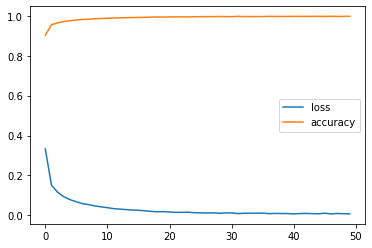

In [5]:
model_performance = pd.DataFrame(model.history.history)
ax = model_performance.plot()
ax.set_label('Epochs')

In [6]:
model.evaluate(test_features,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2243 - accuracy: 0.9717


[0.2242763191461563, 0.9717000126838684]